In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [3]:
encodings_to_try = ['utf-8-sig', 'latin-1', 'ISO-8859-1']

for encoding in encodings_to_try:
    try:
        df = pd.read_csv("C:/Users/15694/Desktop/Cross selling/code/Michelle/variable_without_pca2.csv", encoding=encoding)
        break
    except UnicodeDecodeError:
        continue

In [4]:
df.head()

,SIX_MONTH_BAL_OS_SAVINGS,SIX_MONTH_BAL_OS_CURRENT,SIX_MONTH_BAL_OS_FD,SIX_MONTH_BAL_OS_LEASING,SIX_MONTH_BAL_OS_CARD,SIX_MONTH_BAL_OS_OD,TOTAL_AVG_BAL,FD_AMOUNT_UNDER_LIEN,CURRENT_AMOUNT_UNDER_LIEN,SAVINGS_AMOUNT_UNDER_LIEN,CUSTOMER_PROFITABILITY,NO_OF_ASSERT_ACCOUNTS,NO_OF_LIABILITY_ACCOUNTS,CR_DR_Usage,NPA_FLAG,LOAN_CAT1
0,0.042612,-0.048785,-0.053259,-0.134894,-0.155864,-0.075719,-0.062581,-0.023629,-0.044929,-0.056843,-0.003142,0.397017,1.805905,0.051895,0,3
1,-0.091396,-0.048785,0.066148,-0.134894,-0.297359,-0.075719,-0.050164,-0.023629,-0.044929,-0.056843,-0.010305,-0.623858,0.600067,-0.067204,0,3
2,-0.076329,-0.048785,0.031772,-0.134894,1.262271,-0.059430,-0.065534,-0.023629,-0.044929,-0.056843,-0.006337,1.417891,1.805905,-0.023470,0,0
3,-0.101346,-0.048785,0.308069,-0.134894,-0.297359,-0.075719,-0.010893,-0.023629,-0.044929,-0.056843,0.017446,-0.623858,0.198120,-0.067204,0,3
4,-0.013879,-0.048785,-0.071656,-0.134894,-0.297359,-0.075719,-0.053618,-0.023629,-0.044929,-0.056843,-0.004448,-0.623858,-0.203826,-0.067204,1,4


In [5]:
df.columns

Index(['SIX_MONTH_BAL_OS_SAVINGS', 'SIX_MONTH_BAL_OS_CURRENT',
       'SIX_MONTH_BAL_OS_FD', 'SIX_MONTH_BAL_OS_LEASING',
       'SIX_MONTH_BAL_OS_CARD', 'SIX_MONTH_BAL_OS_OD', 'TOTAL_AVG_BAL',
       'FD_AMOUNT_UNDER_LIEN', 'CURRENT_AMOUNT_UNDER_LIEN',
       'SAVINGS_AMOUNT_UNDER_LIEN', 'CUSTOMER_PROFITABILITY',
       'NO_OF_ASSERT_ACCOUNTS', 'NO_OF_LIABILITY_ACCOUNTS', 'CR_DR_Usage',
       'NPA_FLAG', 'LOAN_CAT1'],
      dtype='object')

In [6]:
df.shape

(11836, 16)

In [7]:
df.isna().sum()

SIX_MONTH_BAL_OS_SAVINGS     0
SIX_MONTH_BAL_OS_CURRENT     0
SIX_MONTH_BAL_OS_FD          0
SIX_MONTH_BAL_OS_LEASING     0
SIX_MONTH_BAL_OS_CARD        0
SIX_MONTH_BAL_OS_OD          0
TOTAL_AVG_BAL                0
FD_AMOUNT_UNDER_LIEN         0
CURRENT_AMOUNT_UNDER_LIEN    0
SAVINGS_AMOUNT_UNDER_LIEN    0
CUSTOMER_PROFITABILITY       0
NO_OF_ASSERT_ACCOUNTS        0
NO_OF_LIABILITY_ACCOUNTS     0
CR_DR_Usage                  0
NPA_FLAG                     0
LOAN_CAT1                    0
dtype: int64

In [8]:
df1=df[["TOTAL_AVG_BAL","SIX_MONTH_BAL_OS_FD","SIX_MONTH_BAL_OS_LEASING","NPA_FLAG",
        "CUSTOMER_PROFITABILITY","SIX_MONTH_BAL_OS_SAVINGS","SIX_MONTH_BAL_OS_CURRENT",
        "SIX_MONTH_BAL_OS_OD","SAVINGS_AMOUNT_UNDER_LIEN","LOAN_CAT1"]]

In [9]:
df1.shape

(11836, 10)

In [10]:
X = df1.drop(columns=["LOAN_CAT1"])
Y = df1["LOAN_CAT1"]

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score, f1_score,  classification_report, confusion_matrix



In [12]:
train_set, test_set = train_test_split(df1, test_size=0.3, random_state=0)

# Converting train_set and test_set to dataframes
train_df = pd.DataFrame(train_set)
test_df = pd.DataFrame(test_set)

In [13]:
df_cat_0 = train_df[train_df.LOAN_CAT1==0]
df_cat_1 = train_df[train_df.LOAN_CAT1==1]
df_cat_2 = train_df[train_df.LOAN_CAT1==2]
df_cat_3 = train_df[train_df.LOAN_CAT1==3]
df_cat_4 = train_df[train_df.LOAN_CAT1==4]
df_cat_5 = train_df[train_df.LOAN_CAT1==5]
df_cat_0.shape,df_cat_1.shape,df_cat_2.shape,df_cat_3.shape,df_cat_4.shape,df_cat_5.shape

((185, 10), (2006, 10), (1246, 10), (3221, 10), (796, 10), (831, 10))

In [14]:
##### The data set is imbalanced

In [15]:

X_train = train_df.drop(columns=["LOAN_CAT1"])
y_train = train_df["LOAN_CAT1"]
X_train.shape, y_train.shape

((8285, 9), (8285,))

In [16]:
X_test = test_df.drop(columns=["LOAN_CAT1"])
y_test = test_df["LOAN_CAT1"]
X_test.shape, y_test.shape

((3551, 9), (3551,))

In [17]:
from sklearn.utils import resample

In [18]:
df_minority = train_df[train_df["LOAN_CAT1"] == 0]
df_majority_1 = train_df[train_df["LOAN_CAT1"] == 1]
df_majority_2 = train_df[train_df["LOAN_CAT1"] == 2]
df_majority_3 = train_df[train_df["LOAN_CAT1"] == 3]
df_majority_4 = train_df[train_df["LOAN_CAT1"] == 4]
df_majority_5 = train_df[train_df["LOAN_CAT1"] == 5]

##### undersampling

In [19]:
from sklearn.utils import resample
df_majority_1_downsampled = resample(df_majority_1, replace=True, n_samples=len(df_minority), random_state=42)
df_majority_2_downsampled = resample(df_majority_2, replace=True, n_samples=len(df_minority), random_state=42)
df_majority_3_downsampled = resample(df_majority_3, replace=True, n_samples=len(df_minority), random_state=42)
df_majority_4_downsampled = resample(df_majority_4, replace=True, n_samples=len(df_minority), random_state=42)
df_majority_5_downsampled = resample(df_majority_5, replace=True, n_samples=len(df_minority), random_state=42)

In [20]:
train_downsampled = pd.concat([df_minority,
                             df_majority_1_downsampled,
                             df_majority_2_downsampled,
                             df_majority_3_downsampled,
                             df_majority_4_downsampled,
                             df_majority_5_downsampled,
                             ])

In [21]:
train_downsampled["LOAN_CAT1"].value_counts()

0    185
1    185
2    185
3    185
4    185
5    185
Name: LOAN_CAT1, dtype: int64

In [22]:
X_under = train_downsampled.drop("LOAN_CAT1", axis=1)
Y_under = train_downsampled["LOAN_CAT1"]

X_under.shape, X_test.shape,Y_under.shape, y_test.shape

((1110, 9), (3551, 9), (1110,), (3551,))

In [23]:
import xgboost as xgb
xg_boost=xgb.XGBClassifier()
xg_boost.fit(X_under,Y_under)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [24]:
# Make predictions on the test set
y_pred = xg_boost.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec_macro = precision_score(y_test, y_pred, average='macro')
recall_macro = recall_score(y_test, y_pred, average='macro')
f1_macro = f1_score(y_test, y_pred, average='macro')
classification_rep = classification_report(y_test, y_pred)
print("Accuracy Score:", acc)
print("Precision (Macro):", prec_macro)
print("Recall (Macro):", recall_macro)
print("F1 Score (Macro):", f1_macro)

# Confusion Matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cf_matrix)
print("\nClassification Report:\n", classification_rep)

Accuracy Score: 0.580963108983385
Precision (Macro): 0.5403467229527967
Recall (Macro): 0.6145585268629469
F1 Score (Macro): 0.5413147843428595
Confusion Matrix:
[[ 48  14   6   3   0   2]
 [156 400 231  50   9   1]
 [ 29  97 316 109  20   4]
 [ 26  47 218 779 221  36]
 [  3   0   5  51 227  52]
 [  0   0   2   9  87 293]]

Classification Report:
               precision    recall  f1-score   support

           0       0.18      0.66      0.29        73
           1       0.72      0.47      0.57       847
           2       0.41      0.55      0.47       575
           3       0.78      0.59      0.67      1327
           4       0.40      0.67      0.50       338
           5       0.76      0.75      0.75       391

    accuracy                           0.58      3551
   macro avg       0.54      0.61      0.54      3551
weighted avg       0.65      0.58      0.60      3551



In [25]:
y_pred_train_XG = xg_boost.predict(X_under)
acc = accuracy_score(Y_under, y_pred_train_XG)
prec_macro = precision_score(Y_under, y_pred_train_XG, average='macro')
recall_macro = recall_score(Y_under, y_pred_train_XG, average='macro')
f1_macro = f1_score(Y_under, y_pred_train_XG, average='macro')
classification_rep = classification_report(Y_under,y_pred_train_XG)
print("Accuracy Score:", acc)
print("Precision (Macro):", prec_macro)
print("Recall (Macro):", recall_macro)
print("F1 Score (Macro):", f1_macro)

# Confusion Matrix
cf_matrix_XG = confusion_matrix(Y_under, y_pred_train_XG)
print("Confusion Matrix:")
print(cf_matrix_XG )
print("\nClassification Report:\n", classification_rep)

Accuracy Score: 1.0
Precision (Macro): 1.0
Recall (Macro): 1.0
F1 Score (Macro): 1.0
Confusion Matrix:
[[185   0   0   0   0   0]
 [  0 185   0   0   0   0]
 [  0   0 185   0   0   0]
 [  0   0   0 185   0   0]
 [  0   0   0   0 185   0]
 [  0   0   0   0   0 185]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       185
           1       1.00      1.00      1.00       185
           2       1.00      1.00      1.00       185
           3       1.00      1.00      1.00       185
           4       1.00      1.00      1.00       185
           5       1.00      1.00      1.00       185

    accuracy                           1.00      1110
   macro avg       1.00      1.00      1.00      1110
weighted avg       1.00      1.00      1.00      1110



In [26]:
# tuning

In [27]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
xgb= XGBClassifier()
xg_param_grid = {
              'n_estimators' : [100,150,200],
              'learning_rate': [0.005, 0.01],
                'booster': ['gbtree'],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              
              }

In [28]:
gsxgb = GridSearchCV(xgb,param_grid = xg_param_grid, cv=5, scoring="accuracy", n_jobs= 4, verbose = 2)

gsxgb.fit(X_under, Y_under)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


C:\Users\15694\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [10:50:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=4,
             param_grid={'booster': ['gbtree'], 'learning_rate': [0.005, 0.01],
                         'max_depth': [4, 8], 'min_samples_leaf': [100, 150],
                         'n_estimators': [100, 150, 200]},
             scoring='accuracy', verbose=2)

In [29]:
gsxgb.best_estimator_

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, min_samples_leaf=100, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)

In [30]:
best_xg_GCV=XGBClassifier(max_depth=8, n_estimators=200,learning_rate=0.01,min_samples_leaf=100)
best_xg_GCV.fit(X_under, Y_under)

C:\Users\15694\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [10:50:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, min_samples_leaf=100, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)

In [31]:
y_pred_xg_GCV = best_xg_GCV.predict(X_test)
y_pred_xg_GCV_train = best_xg_GCV.predict(X_under)

In [32]:
acc = accuracy_score(y_test, y_pred_xg_GCV)
prec_macro = precision_score(y_test,y_pred_xg_GCV, average='macro')
recall_macro = recall_score(y_test, y_pred_xg_GCV, average='macro')
f1_macro = f1_score(y_test,y_pred_xg_GCV, average='macro')
classification_rep_xg_GCV = classification_report(y_test,y_pred_xg_GCV)
print("Accuracy Score:", acc)
print("Precision (Macro):", prec_macro)
print("Recall (Macro):", recall_macro)
print("F1 Score (Macro):", f1_macro)

# Confusion Matrix
cf_matrix_xg_gcv = confusion_matrix(y_test, y_pred_xg_GCV)
print("Confusion Matrix:")
print(cf_matrix_xg_gcv)
print("\nClassification Report:\n", classification_rep_xg_GCV)

Accuracy Score: 0.5905378766544636
Precision (Macro): 0.5532824630993946
Recall (Macro): 0.6280960021457459
F1 Score (Macro): 0.5516049374287552
Confusion Matrix:
[[ 48  15   5   3   0   2]
 [175 373 244  44  11   0]
 [ 29 103 329  92  19   3]
 [ 28  42 215 800 211  31]
 [  3   0   7  48 241  39]
 [  0   0   3  11  71 306]]

Classification Report:
               precision    recall  f1-score   support

           0       0.17      0.66      0.27        73
           1       0.70      0.44      0.54       847
           2       0.41      0.57      0.48       575
           3       0.80      0.60      0.69      1327
           4       0.44      0.71      0.54       338
           5       0.80      0.78      0.79       391

    accuracy                           0.59      3551
   macro avg       0.55      0.63      0.55      3551
weighted avg       0.67      0.59      0.61      3551



In [33]:
acc1 = accuracy_score(Y_under, y_pred_xg_GCV_train)
prec_macro1 = precision_score(Y_under,y_pred_xg_GCV_train, average='macro')
recall_macro1 = recall_score(Y_under, y_pred_xg_GCV_train, average='macro')
f1_macro1 = f1_score(Y_under,y_pred_xg_GCV_train, average='macro')
classification_rep_xg_GCV_Train = classification_report(Y_under,y_pred_xg_GCV_train)
print("Accuracy Score:", acc1)
print("Precision (Macro):", prec_macro1)
print("Recall (Macro):", recall_macro1)
print("F1 Score (Macro):", f1_macro1)

# Confusion Matrix
cf_matrix_xg_gcv_train = confusion_matrix(Y_under, y_pred_xg_GCV_train)
print("Confusion Matrix:")
print(cf_matrix_xg_gcv_train)
print("\nClassification Report:\n", classification_rep_xg_GCV_Train)

Accuracy Score: 0.9234234234234234
Precision (Macro): 0.9246076107567411
Recall (Macro): 0.9234234234234234
F1 Score (Macro): 0.9233107616754502
Confusion Matrix:
[[179   3   2   0   1   0]
 [  9 163  10   2   1   0]
 [  1  12 169   3   0   0]
 [  0   3  14 158  10   0]
 [  0   0   0   3 179   3]
 [  0   1   1   1   5 177]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       185
           1       0.90      0.88      0.89       185
           2       0.86      0.91      0.89       185
           3       0.95      0.85      0.90       185
           4       0.91      0.97      0.94       185
           5       0.98      0.96      0.97       185

    accuracy                           0.92      1110
   macro avg       0.92      0.92      0.92      1110
weighted avg       0.92      0.92      0.92      1110



In [34]:
from sklearn.metrics import roc_curve,auc


In [35]:
y_prob=best_xg_GCV.predict_proba(X_test)

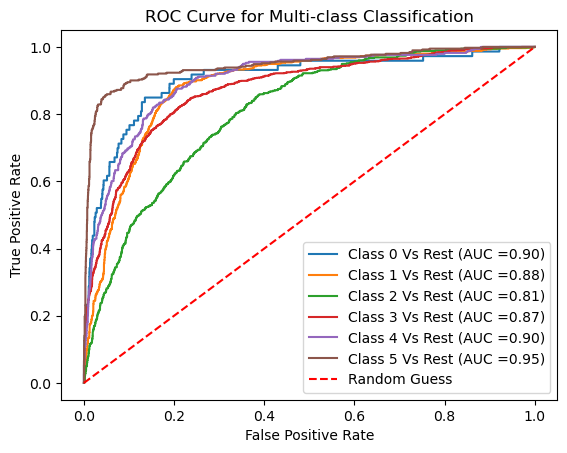

In [36]:
for i in range(len(np.unique(Y))):
    fpt,tpr,_=roc_curve(y_test==i,y_prob[:,i])
    roc_auc=auc(fpt,tpr)
    plt.plot(fpt,tpr,label=f'Class {i} Vs Rest (AUC ={roc_auc:.2f})')
    
plt.plot([0,1],[0,1],linestyle='--',color='r',label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-class Classification')
plt.legend()
plt.show()

In [37]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_prob,multi_class='ovr')

0.8855665632014293